# Importing the neccesarry librabries

In [22]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet


# Loading the dataset

In [23]:
df1 = pd.read_csv("london.csv")

In [24]:
df1

,Unnamed: 0,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
0,0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY
1,1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA
2,2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL
3,3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP
4,4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL
...,...,...,...,...,...,...,...,...,...,...,...
3475,3475,One Lillie Square,3350000,New development,1410,3,3,3,NaN,Lillie Square,SW6 1UE
3476,3476,St. James's Street,5275000,Flat / Apartment,1749,3,3,3,St James's,London,SW1A 1JT
3477,3477,Ingram Avenue,5995000,House,4435,6,6,6,Hampstead Garden Suburb,London,NW11 6TG
3478,3478,Cork Street,6300000,New development,1506,3,3,3,Mayfair,London,W1S 3AR


# Data Exploration

In [3]:
#Let's take a look at the first 5 rows of the dataset
df1.head()

,Unnamed: 0,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
0,0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY
1,1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA
2,2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL
3,3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP
4,4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL


In [4]:
#Let's take a look at the last 5 rows of the dataset
df1.tail()

,Unnamed: 0,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
3475,3475,One Lillie Square,3350000,New development,1410,3,3,3,NaN,Lillie Square,SW6 1UE
3476,3476,St. James's Street,5275000,Flat / Apartment,1749,3,3,3,St James's,London,SW1A 1JT
3477,3477,Ingram Avenue,5995000,House,4435,6,6,6,Hampstead Garden Suburb,London,NW11 6TG
3478,3478,Cork Street,6300000,New development,1506,3,3,3,Mayfair,London,W1S 3AR
3479,3479,Courtenay Avenue,8650000,House,5395,6,6,6,Highgate,London,N6 4LP


In [27]:
#checking the shape of the data
df1.shape

(3480, 11)

In [7]:
#To get summary of the DataFrame's information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3480 non-null   int64 
 1   Property Name      3480 non-null   object
 2   Price              3480 non-null   int64 
 3   House Type         3480 non-null   object
 4   Area in sq ft      3480 non-null   int64 
 5   No. of Bedrooms    3480 non-null   int64 
 6   No. of Bathrooms   3480 non-null   int64 
 7   No. of Receptions  3480 non-null   int64 
 8   Location           2518 non-null   object
 9   City/County        3480 non-null   object
 10  Postal Code        3480 non-null   object
dtypes: int64(6), object(5)
memory usage: 299.2+ KB


In [34]:
#To group the dataframe by Location column and then counting the occurrences of each group
df1.groupby('Location')['Location'].agg('count')

Location
 161 Millbank            1
 35 Salusbury Road       1
 352 Queenstown Road     1
 372 Queenstown Road     1
 50 Shad Thames          1
                        ..
Winchester Road          1
Windsor Street           1
Woodberry Grove          1
Woodford Green          12
Woodstock Road           1
Name: Location, Length: 656, dtype: int64

In [6]:
#getting the statistical summary of dataset
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,3480.0,1.739500e+03,1.004734e+03,0.0,869.75,1739.5,2609.25,3479.0
Price,3480.0,1.864173e+06,2.267283e+06,180000.0,750000.00,1220000.0,2150000.00,39750000.0
Area in sq ft,3480.0,1.712974e+03,1.364259e+03,274.0,834.00,1310.0,2157.25,15405.0
No. of Bedrooms,3480.0,3.103736e+00,1.517698e+00,0.0,2.00,3.0,4.00,10.0
No. of Bathrooms,3480.0,3.103736e+00,1.517698e+00,0.0,2.00,3.0,4.00,10.0
No. of Receptions,3480.0,3.103736e+00,1.517698e+00,0.0,2.00,3.0,4.00,10.0


In [11]:
#To count the number of missing values in each column of the DataFrame
df1.isnull().sum()

Unnamed: 0             0
Property Name          0
Price                  0
House Type             0
Area in sq ft          0
No. of Bedrooms        0
No. of Bathrooms       0
No. of Receptions      0
Location             962
City/County            0
Postal Code            0
dtype: int64

In [13]:
#To count the number of unique values in each column of a DataFrame
df1.nunique()

Unnamed: 0           3480
Property Name        2380
Price                 536
House Type              8
Area in sq ft        2034
No. of Bedrooms        11
No. of Bathrooms       11
No. of Receptions      11
Location              656
City/County            57
Postal Code          2845
dtype: int64

# Data Cleaning

In [28]:
#Remove the column "Unwanted:0" because is it no needed for the project
df2 = df1.drop(['Unnamed: 0'], axis='columns')
df2.head()

,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY
1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA
2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL
3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP
4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL


In [26]:
## Remove duplicates based on all column
df2 = df1.drop_duplicates()

In [29]:
df2

,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY
1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA
2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL
3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP
4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL
...,...,...,...,...,...,...,...,...,...,...
3475,One Lillie Square,3350000,New development,1410,3,3,3,NaN,Lillie Square,SW6 1UE
3476,St. James's Street,5275000,Flat / Apartment,1749,3,3,3,St James's,London,SW1A 1JT
3477,Ingram Avenue,5995000,House,4435,6,6,6,Hampstead Garden Suburb,London,NW11 6TG
3478,Cork Street,6300000,New development,1506,3,3,3,Mayfair,London,W1S 3AR


In [27]:
#To check for missing values

# Print missing values by column
print("Missing Values by Column")
print("-" * 30)
print(df2.isna().sum())

# Print a separator line
print("-" * 30)

# Calculate and print the total number of missing values
print("TOTAL MISSING VALUES:", df2.isna().sum().sum())


Missing Values by Column
------------------------------
Price                0
Area in sq ft        0
Area in sq ft        0
No. of Bedrooms      0
No. of Bathrooms     0
No. of Receptions    0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 0


In [44]:
#To calculate the correlation matrix for the DataFrame
# first we Exclude non-numeric columns from correlation calculation
numeric_columns = df2.select_dtypes(exclude=['object']).columns
correlation_matrix = df2[numeric_columns].corr()

print(correlation_matrix)

                      Price  Area in sq ft  Area in sq ft  Area in sq ft  \
Price              1.000000       0.667710       0.667710       0.667710   
Area in sq ft      0.667710       1.000000       1.000000       1.000000   
Area in sq ft      0.667710       1.000000       1.000000       1.000000   
Area in sq ft      0.667710       1.000000       1.000000       1.000000   
Area in sq ft      0.667710       1.000000       1.000000       1.000000   
No. of Bedrooms    0.435533       0.777299       0.777299       0.777299   
No. of Bathrooms   0.435533       0.777299       0.777299       0.777299   
No. of Receptions  0.435533       0.777299       0.777299       0.777299   

                   Area in sq ft  No. of Bedrooms  No. of Bathrooms  \
Price                   0.667710         0.435533          0.435533   
Area in sq ft           1.000000         0.777299          0.777299   
Area in sq ft           1.000000         0.777299          0.777299   
Area in sq ft           1.00000

# Data Visualization

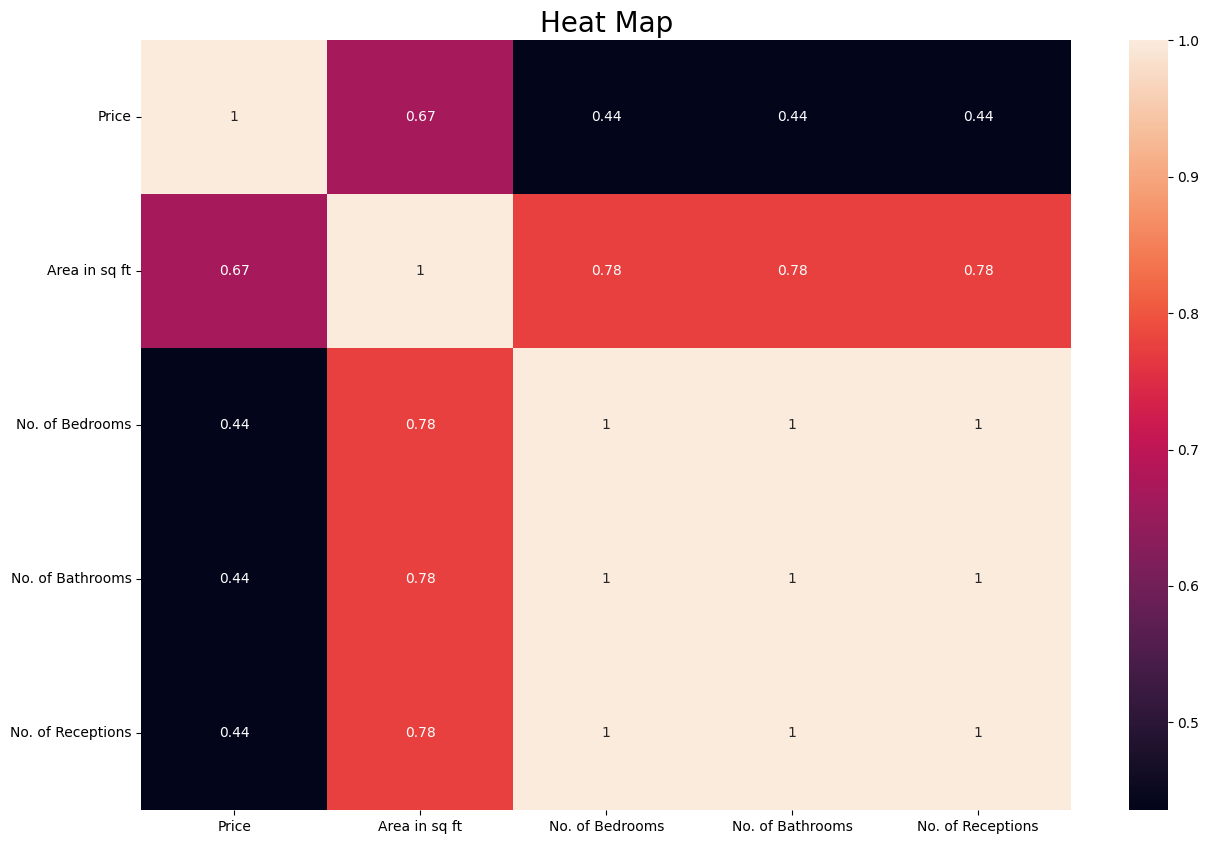

In [7]:
#To use Seaborn to create a heatmap of the correlation matrix for the numeric columns in the DataFrame (df2)

# Set the figure size
plt.figure(figsize=(15, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(df2[numeric_columns].corr(), annot=True)

# Set the title
plt.title('Heat Map', size=20)

# Rotate y-axis labels for better readability
plt.yticks(rotation = 0)

# Show the plot
plt.show()

<Figure size 2500x500 with 0 Axes>

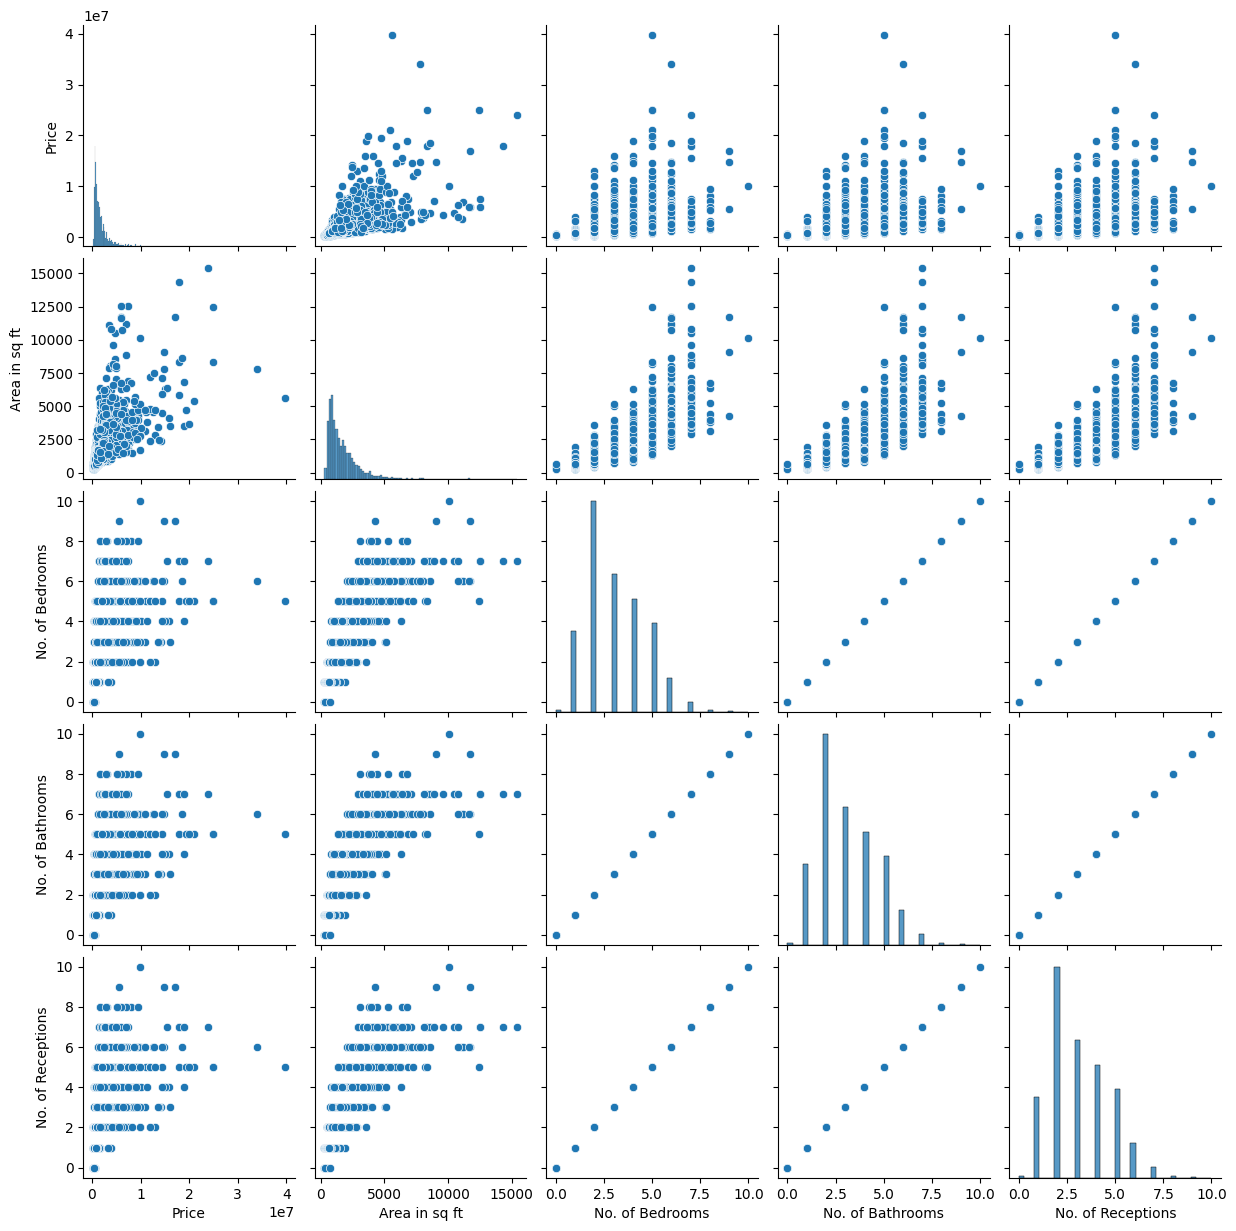

In [79]:
#To create a pair plot using Seaborn
plt.figure(figsize=(25, 5))
sns.pairplot(df2)
plt.show()

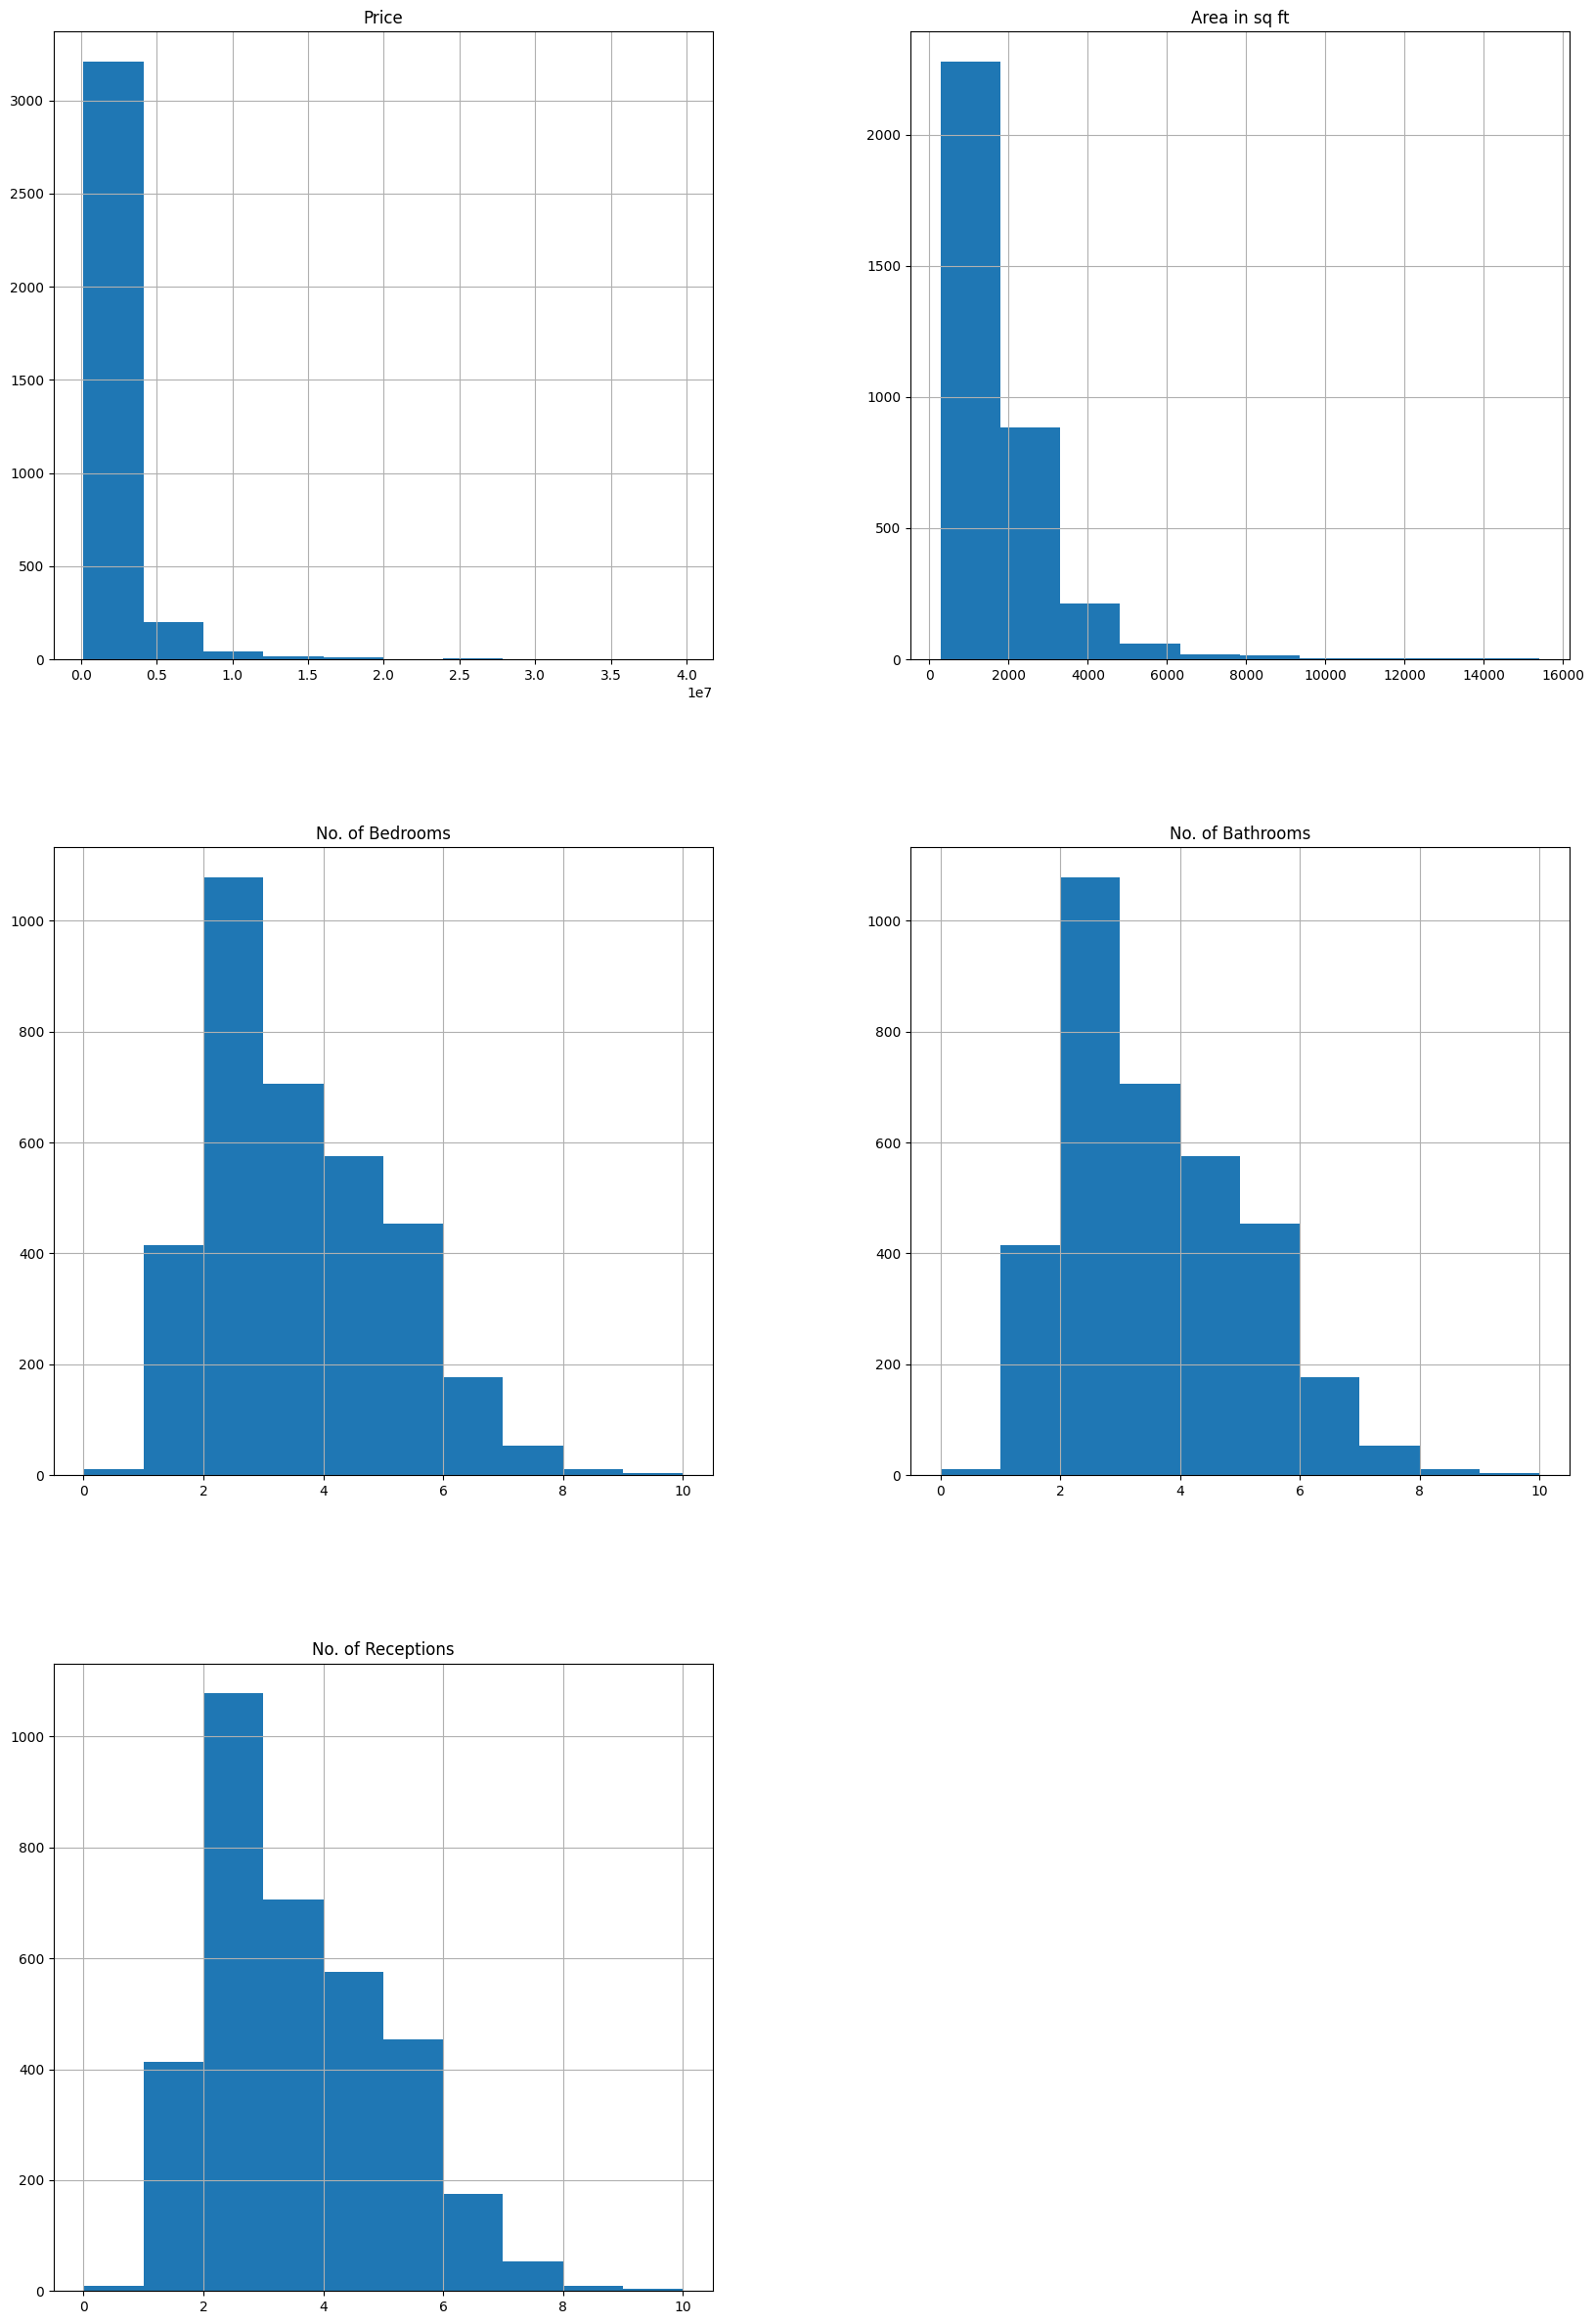

In [32]:
#to create histograms for each column in the DataFrame and display them in grid
df2.hist(figsize=(20,30))
plt.show ()

<Figure size 1000x800 with 0 Axes>

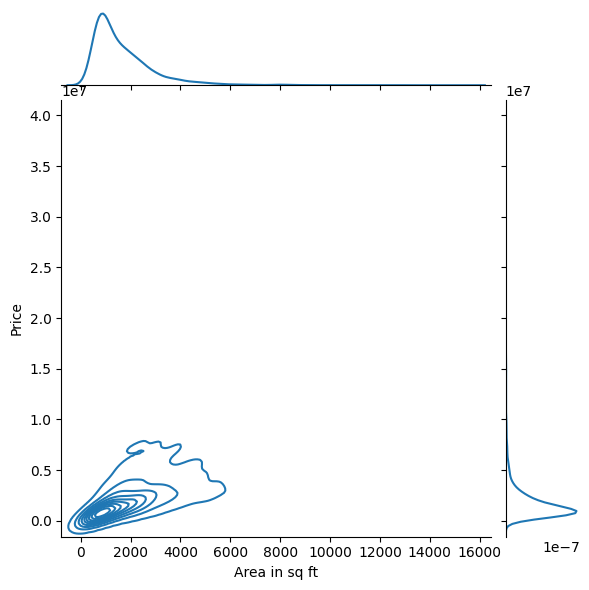

In [62]:
#Visualizing the Correlation between each column and the target variable using jointplot visualization
plt.figure(figsize=(10, 8))

# KDE plot for the relationship between "Area in sq ft" and "Price"
sns.jointplot(x=df2["Area in sq ft"], y=df2["Price"], kind="kde")

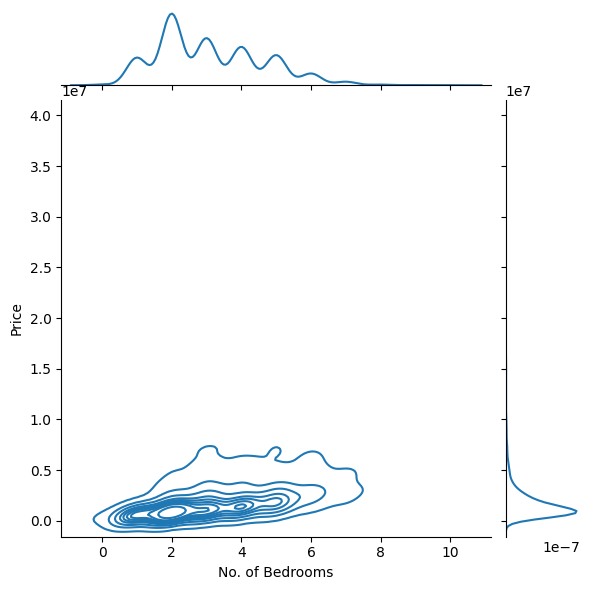

In [58]:
# KDE plot for the relationship between "No. of Bedrooms" and "Price"
sns.jointplot(x=df2["No. of Bedrooms"], y=df2["Price"], kind="kde")

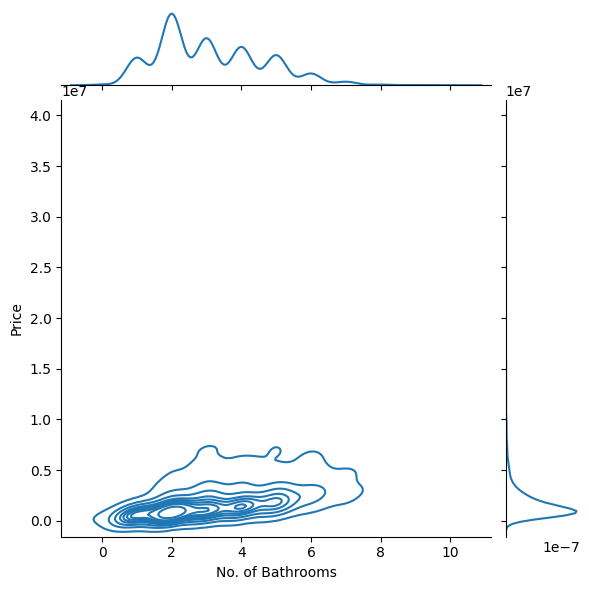

In [59]:
# KDE plot for the relationship between "No. of Bathrooms" and "Price"
sns.jointplot(x=df2["No. of Bathrooms"], y=df2["Price"], kind="kde")

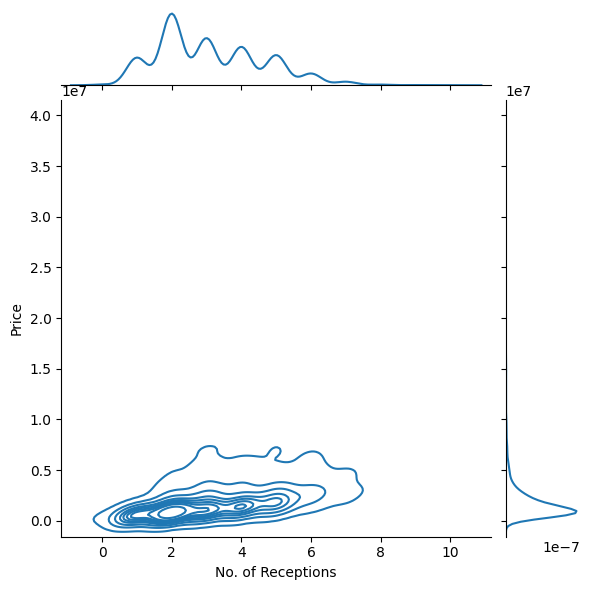

In [60]:
# KDE plot for the relationship between "No. of Receptions" and "Price"
sns.jointplot(x=df2["No. of Receptions"], y=df2["Price"], kind="kde")


<Axes: title={'center': 'price Range'}>

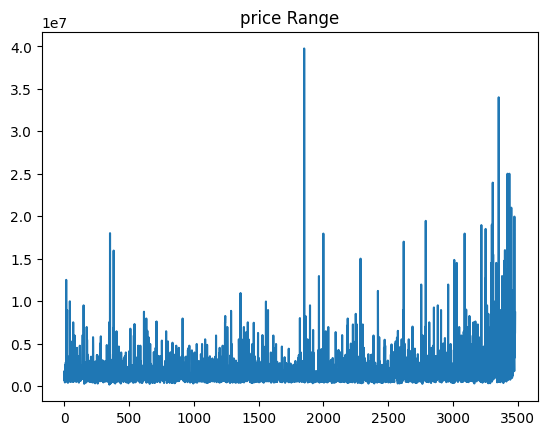

In [87]:
## Plot the 'Price' column
df2['Price'].plot(title='price Range')

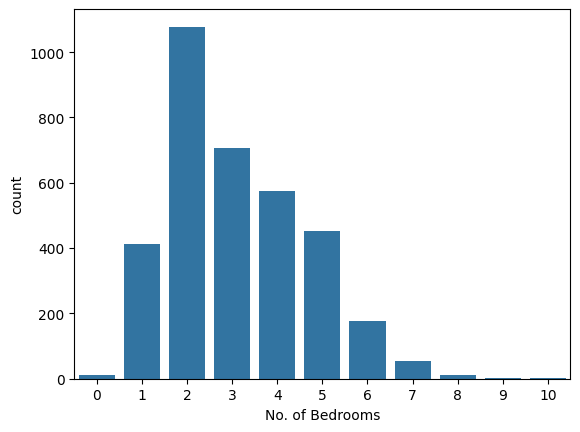

In [91]:
# Create a count plot
sns.countplot(data=df2, x=df2['No. of Bedrooms'])

# Show the plot
plt.show()

# X, y Split

In [45]:
###Splitting the data into X and y chunks

#To split the DataFram df2 into features (X) and the target variable (y)

# X contains all columns from df2 except the "Price" column
X = df2.drop("Price", axis=1)

# y contains only the "Price" column
y = df2["Price"]

In [46]:
# Select important numerical columns based on correlation with "Price"

important_num_cols = list(
    df2[numeric_columns].corr()["Price"][
        (df2[numeric_columns].corr()["Price"] > 0.50) | 
        (df2[numeric_columns].corr()["Price"] < -0.50)
    ].index
)

# List of categorical columns
cat_cols = ["Area in sq ft", "No. of Bedrooms", "No. of Bathrooms", "No. of Receptions"]

# Combine important numerical and categorical columns
important_cols = important_num_cols + cat_cols

# Select only the important columns in df2
df2 = df2[important_cols]

# Remove "Price" from the list of important numerical columns
important_num_cols.remove("Price")

# Initialize StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to scale the selected numerical columns in X
X[important_num_cols] = scaler.fit_transform(X[important_num_cols])


# Data preprocessing

# Train-Test split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
#To calculate the root mean squared error (RMSE) using cross-validation and evaluating the performance of a model based on various metrics.

def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

# Machine Learning Models

In [49]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

# Linear Regression

In [67]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-" * 30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression", "MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}

# Check if 'models' is already defined and is a DataFrame
if 'models' not in locals() or not isinstance(models, pd.DataFrame):
    # If not, create a new DataFrame
    models = pd.DataFrame(columns=["Model", "MAE", "MSE", "RMSE", "R2 Score", "RMSE (Cross-Validation)"])

# Debug: Print the type of 'models'
print("Type of 'models':", type(models))

# Concatenate the new row to the DataFrame and reassign to 'models'
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)


MAE: 754185.4698088712
MSE: 2089206004776.7905
RMSE: 1445408.5944039458
R2 Score: 0.3451183513400292
------------------------------
RMSE Cross-Validation: 1636715.571166643
Type of 'models': <class 'pandas.core.frame.DataFrame'>


C:\Users\HP\AppData\Local\Temp\ipykernel_6304\1013403743.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)


# Random Forest Regressor

In [68]:
# Train RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

# Evaluate the model
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-" * 30)

# Calculate RMSE Cross-Validation
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

# Create a new DataFrame with the results
new_row = {
    "Model": "RandomForestRegressor",
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "R2 Score": r_squared,
    "RMSE (Cross-Validation)": rmse_cross_val
}
new_df = pd.DataFrame([new_row])

# Concatenate the new DataFrame with the existing models DataFrame
models = pd.concat([models, new_df], ignore_index=True)


MAE: 831930.922297365
MSE: 2989220737953.8213
RMSE: 1728936.30245704
R2 Score: 0.06300010597139749
------------------------------
RMSE Cross-Validation: 1840379.7415006137


# Elastic Net

In [69]:
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
predictions = elastic_net.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(elastic_net)
print("RMSE Cross-Validation:", rmse_cross_val)

# Create a new DataFrame with the results
new_row = {
    "Model": "RandomForestRegressor",
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "R2 Score": r_squared,
    "RMSE (Cross-Validation)": rmse_cross_val
}
new_df = pd.DataFrame([new_row])

# Concatenate the new DataFrame with the existing models DataFrame
models = pd.concat([models, new_df], ignore_index=True)

MAE: 784620.9661767442
MSE: 2021616410569.6624
RMSE: 1421835.5778955815
R2 Score: 0.3663049575365549
------------------------------
RMSE Cross-Validation: 1656711.1744914446


# Neural Networks

In [70]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a neural network for regression
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model with a lower learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Train the model with an increased number of epochs
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.2)

# Evaluate the model on the test set
loss, mae = model.evaluate(X_test, y_test, verbose=2)
print("Mean Absolute Error on Test Set:", mae)


Epoch 1/20

122/122 [==============================] - 15s 11ms/step - loss: 8268295438336.0000 - mae: 1842693.0000 - val_loss: 9812611956736.0000 - val_mae: 2061434.6250
Epoch 2/20
122/122 [==============================] - 1s 7ms/step - loss: 8268267126784.0000 - mae: 1842687.1250 - val_loss: 9812554285056.0000 - val_mae: 2061421.8750
Epoch 3/20
122/122 [==============================] - 1s 7ms/step - loss: 8268149161984.0000 - mae: 1842657.6250 - val_loss: 9812324646912.0000 - val_mae: 2061373.1250
Epoch 4/20
122/122 [==============================] - 1s 8ms/step - loss: 8267791073280.0000 - mae: 1842572.2500 - val_loss: 9811737444352.0000 - val_mae: 2061250.2500
Epoch 5/20
122/122 [==============================] - 1s 8ms/step - loss: 8267007787008.0000 - mae: 1842386.0000 - val_loss: 9810595545088.0000 - val_mae: 2061012.3750
Epoch 6/20
122/122 [==============================] - 1s 8ms/step - loss: 8265600598016.0000 - mae: 1842051.7500 - val_loss: 9808647290880.0000 - val_mae: 20

# Model Comparison

In [74]:
# Linear Regression results
lin_reg_row = {
    "Model": "Linear Regression",
    "MAE": 780043.6384715987,
    "MSE": 3037241074650.532,
    "RMSE": 1742768.2217238562,
    "R2 Score": 0.43921556622278746,
    "RMSE (Cross-Validation)": 1636715.571166643
}
models = pd.concat([models, pd.DataFrame([lin_reg_row])], ignore_index=True)

# Random Forest Regressor results
random_forest_row = {
    "Model": "Random Forest Regressor",
    "MAE": 804595.0932214655,
    "MSE": 3512140979355.1226,
    "RMSE": 1874070.6975338797,
    "R2 Score": 0.3515318863254785,
    "RMSE (Cross-Validation)": 1841866.9708095535
}
models = pd.concat([models, pd.DataFrame([random_forest_row])], ignore_index=True)

# ElasticNet results
elastic_net_row = {
    "Model": "ElasticNet",
    "MAE": 840840.8999178727,
    "MSE": 3292074848395.3657,
    "RMSE": 1814407.5750490478,
    "R2 Score": 0.39216404479120337,
    "RMSE (Cross-Validation)": 1656711.1744914446
}
models = pd.concat([models, pd.DataFrame([elastic_net_row])], ignore_index=True)

# Artificial Neural Network (ANN) results
ann_row = {
    "Model": "Artificial Neural Network",
    "MAE": 1495473.4272554477,
    "MSE": 7346238178168.275,
    "RMSE": 2710394.4691074537,
    "R2 Score": -0.3563809773021225,
    "RMSE (Cross-Validation)": None  # Replace with the actual value if available
}
models = pd.concat([models, pd.DataFrame([ann_row])], ignore_index=True)

# Display the final DataFrame
print(models)


                       Model           MAE           MSE          RMSE  \
0          Linear Regression  7.800436e+05  3.037241e+12  1.742768e+06   
1    Random Forest Regressor  8.045951e+05  3.512141e+12  1.874071e+06   
2                 ElasticNet  8.408409e+05  3.292075e+12  1.814408e+06   
3  Artificial Neural Network  1.495473e+06  7.346238e+12  2.710394e+06   

   R2 Score  RMSE (Cross-Validation)  
0  0.439216             1.636716e+06  
1  0.351532             1.841867e+06  
2  0.392164             1.656711e+06  
3 -0.356381                      NaN  


C:\Users\HP\AppData\Local\Temp\ipykernel_6304\2904982920.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  models = pd.concat([models, pd.DataFrame([lin_reg_row])], ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6304\2904982920.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  models = pd.concat([models, pd.DataFrame([ann_row])], ignore_index=True)


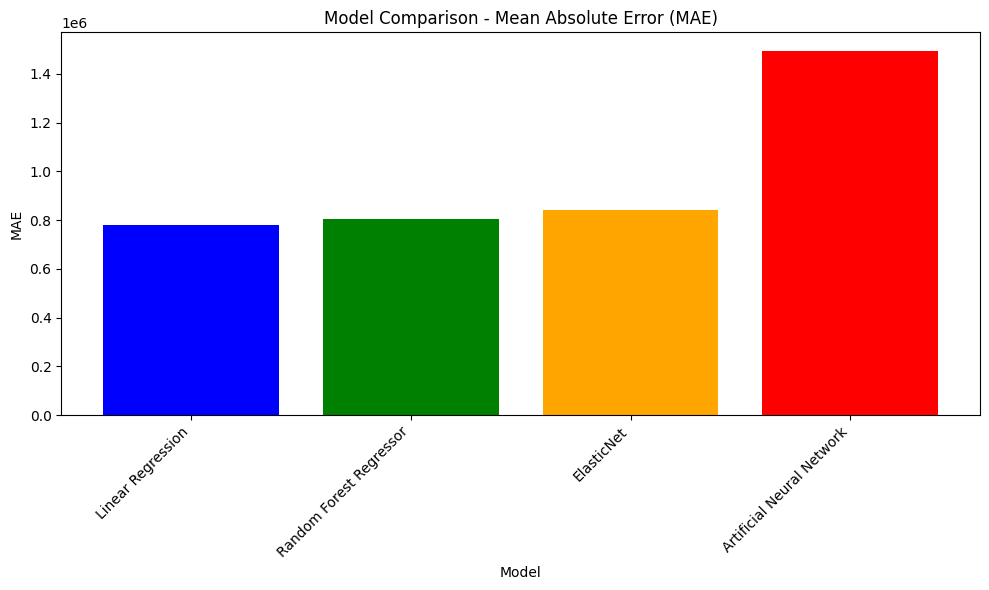

In [75]:

# Create a bar chart for Mean Absolute Error (MAE)
plt.figure(figsize=(10, 6))
plt.bar(models['Model'], models['MAE'], color=['blue', 'green', 'orange', 'red'])
plt.title('Model Comparison - Mean Absolute Error (MAE)')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()
